<a href="https://colab.research.google.com/github/Aleena24/Medium_repo/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd

In [41]:
data = pd.read_csv('/content/World Population Growth.csv')
data['Population'] = data['Population'].replace({',': ''}, regex=True).astype(float)
print(data.head())

   Year    Population Yearly Growth %      Number  Density (Pop/km2)
0  1951  2.543130e+09           1.75%  43,808,223                 17
1  1952  2.590271e+09           1.85%  47,140,519                 17
2  1953  2.640279e+09           1.93%  50,007,898                 18
3  1954  2.691979e+09           1.96%  51,700,542                 18
4  1955  2.746072e+09           2.01%  54,092,802                 18


# Variables for Regression

In [42]:
X = data['Year'].values.reshape(-1, 1)  # Independent variable (Year)
Y = data['Population'].values           # Dependent variable (Population)

# Polynomial Regression

In [43]:
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [44]:
model = LinearRegression()
model.fit(X_poly, Y)


LinearRegression()

In [45]:
Y_poly_pred = model.predict(X_poly)


In [46]:
mse = mean_squared_error(Y, Y_poly_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 226033506701438.34


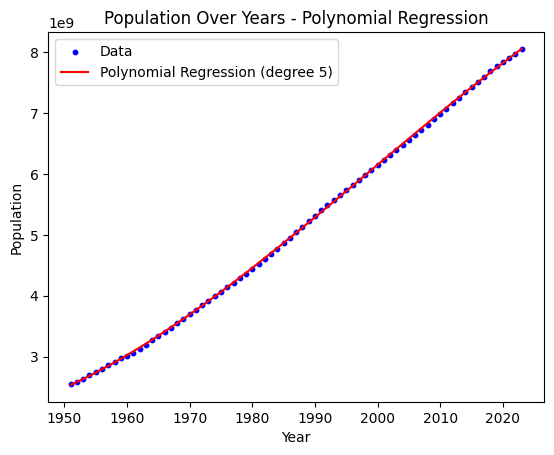

In [47]:
# Sort values for plotting
sorted_X = np.sort(X, axis=0)
sorted_X_poly = poly_features.transform(sorted_X)
sorted_Y_poly_pred = model.predict(sorted_X_poly)

# Plot data and regression curve
plt.scatter(X, Y, color='blue', s=10, label='Data')
plt.plot(sorted_X, sorted_Y_poly_pred, color='red', label=f'Polynomial Regression (degree {degree})')
plt.title('Population Over Years - Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()


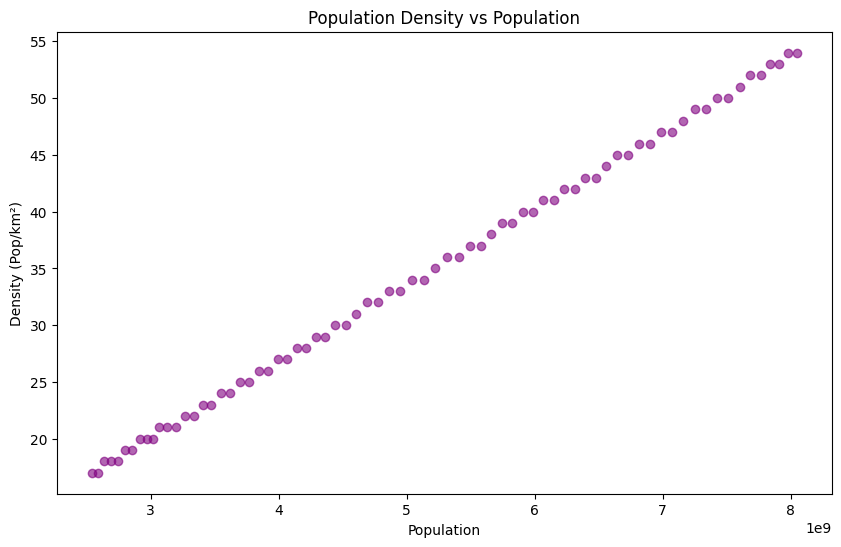

In [48]:
# Scatter plot of Density vs. Population
plt.figure(figsize=(10, 6))
plt.scatter(data['Population'], data['Density (Pop/km2)'], color='purple', alpha=0.6)
plt.title('Population Density vs Population')
plt.xlabel('Population')
plt.ylabel('Density (Pop/km²)')
plt.show()



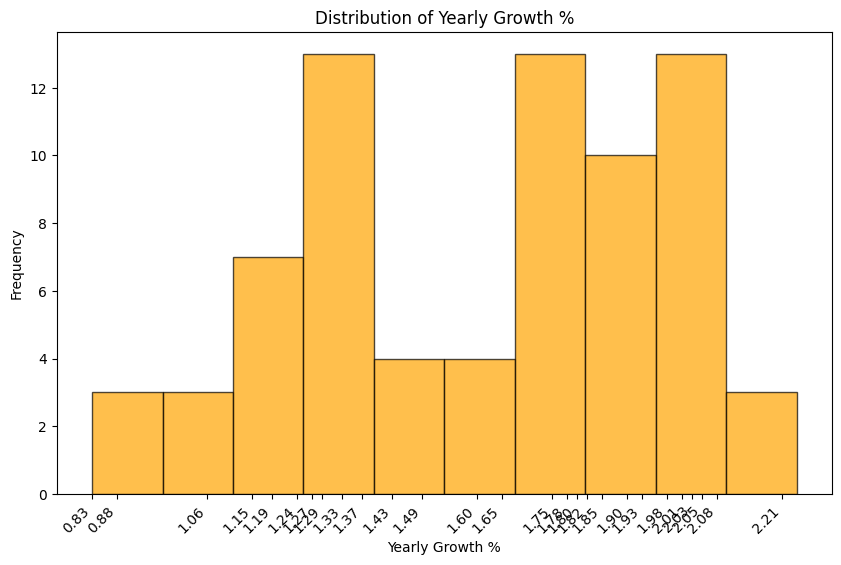

In [49]:
# Clean and convert 'Yearly Growth %' column to numeric
data['Yearly Growth %'] = data['Yearly Growth %'].replace({',': '', '%': ''}, regex=True).astype(float)

# Now create the histogram with accurate x-axis labels
plt.figure(figsize=(10, 6))
plt.hist(data['Yearly Growth %'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Yearly Growth %')
plt.xlabel('Yearly Growth %')
plt.ylabel('Frequency')

# Set x-axis ticks to show all unique growth rates, or a specified interval if there are too many unique values
unique_growth_rates = sorted(data['Yearly Growth %'].unique())  # Get unique values
plt.xticks(unique_growth_rates[::2], rotation=45, ha='right')  # Display every 2nd tick for clarity

plt.show()


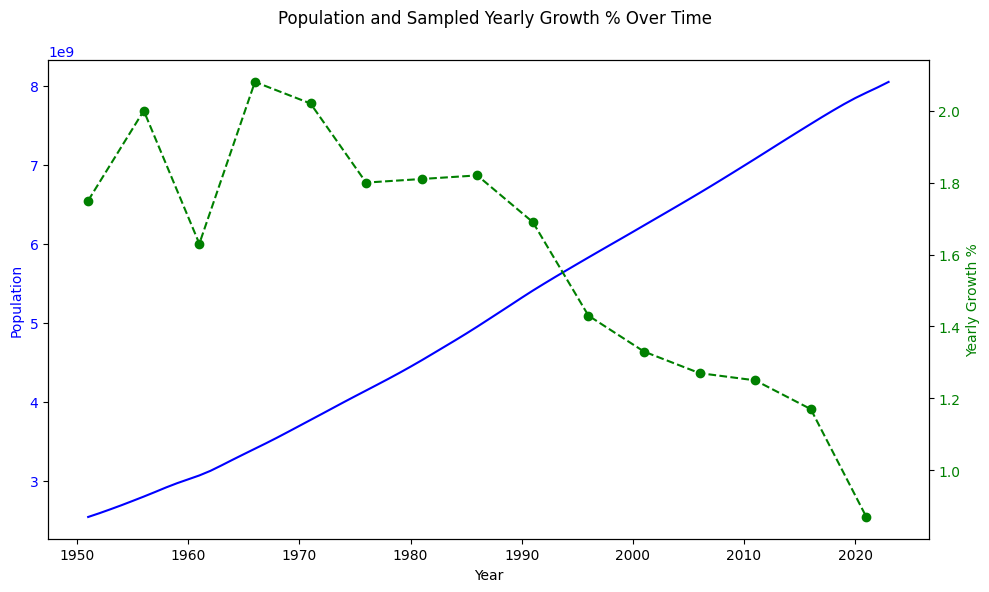

In [50]:
# Sample every 5th point from the data to reduce clutter in growth rate display
sample_interval = 5
sampled_years = data['Year'][::sample_interval]
sampled_growth_rate = data['Yearly Growth %'][::sample_interval]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Population over the years
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='blue')
ax1.plot(data['Year'], data['Population'], color='blue', label='Population')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sampled Yearly Growth % with markers only at sampled intervals
ax2 = ax1.twinx()
ax2.set_ylabel('Yearly Growth %', color='green')
ax2.plot(sampled_years, sampled_growth_rate, color='green', linestyle='--', marker='o', label='Yearly Growth %')
ax2.tick_params(axis='y', labelcolor='green')

# Title and labels
fig.suptitle('Population and Sampled Yearly Growth % Over Time')
fig.tight_layout()
plt.show()
